In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 

from sklearn.preprocessing    import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.metrics          import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection  import train_test_split
from sklearn.ensemble         import RandomForestClassifier, AdaBoostClassifier

from sklearn.tree             import DecisionTreeClassifier, plot_tree

from sklearn.svm              import SVC
from sklearn.model_selection  import GridSearchCV

from sklearn import metrics
warnings.filterwarnings("ignore")

### 1) Завантажити дані, вивести назви колонок і розмір датасету

In [3]:
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### 3) Візуалізувати дані

In [8]:
df.rename(columns={'Serial No.':'Srno','GRE Score':'GRE','TOEFL Score':'TOEFL',
                     'University Rating':'UnivRating','Chance of Admit ':'Chance'},inplace=True)
df.head()

,Srno,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Srno можна видалити, так як ознака ні на що не впливає

In [9]:
df.drop('Srno', axis=1, inplace=True)
df.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
def class_chance(row):
    if row['Chance'] > 0.7 :
        return 1
    else :
        return 0

In [11]:
df['Admit'] = df.apply(class_chance,axis=1)
df.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


**subplots**

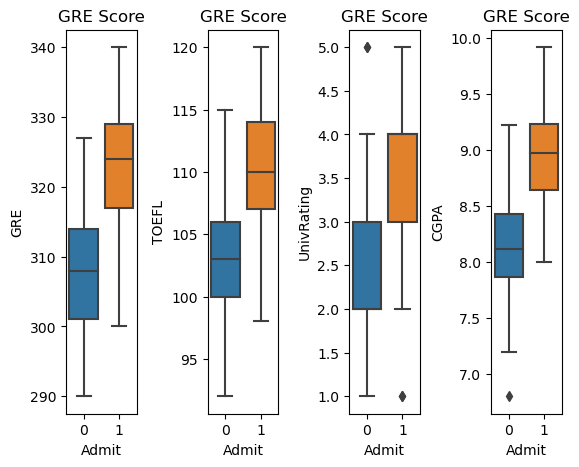

In [13]:
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=1, hspace=0.2)

plt.subplot(141)
sns.boxplot(x='Admit',y='GRE', data=df)
plt.title('GRE Score')



plt.subplot(142)
sns.boxplot(x='Admit',y='TOEFL', data=df)
plt.title('GRE Score')


plt.subplot(143)
sns.boxplot(x='Admit',y='UnivRating', data=df)
plt.title('GRE Score')


plt.subplot(144)
sns.boxplot(x='Admit',y='CGPA', data=df)
plt.title('GRE Score')


plt.show()

**heatmap**

<Axes: >

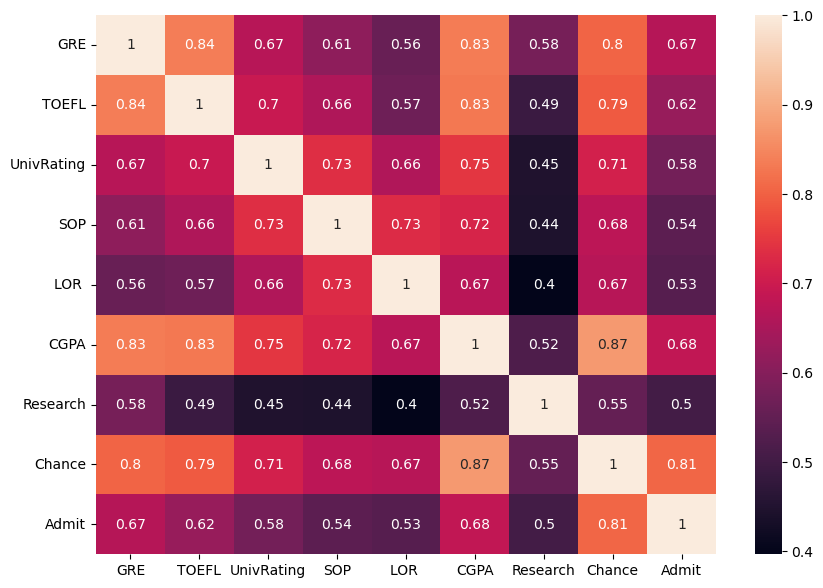

In [14]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

**pairplot**

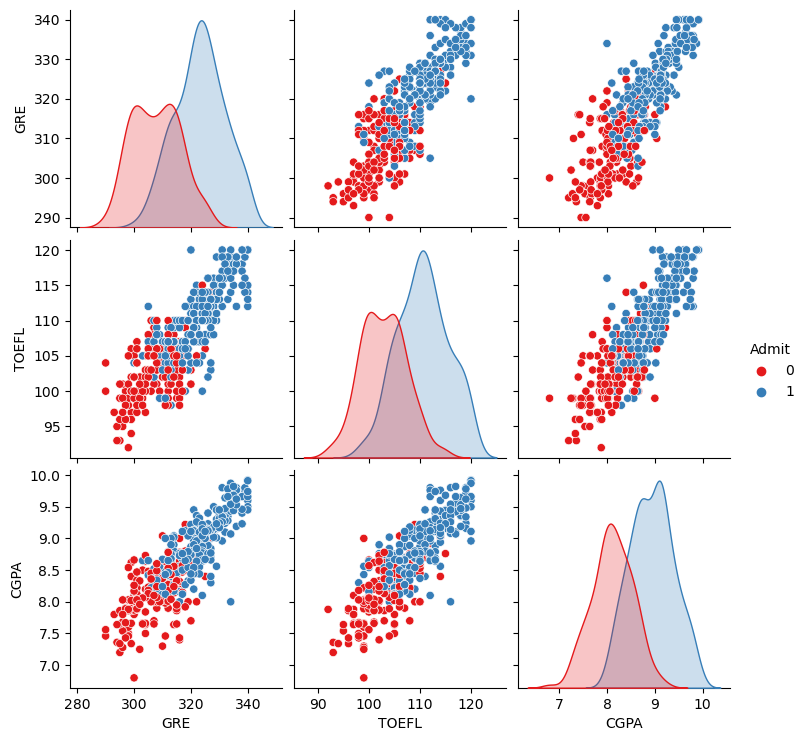

In [15]:
features_row = df[['GRE', 'TOEFL', 'CGPA', 'Admit']]
sns.pairplot(features_row, hue="Admit", palette = 'Set1')

### 4) Провести навчання класифікаторів

**kNN**

In [21]:
x = df.drop(['Admit'], axis=1)
y = df['Admit']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scale = scaler.transform(x_train) 
x_test_scale = scaler.transform(x_test)

In [24]:
knn = KNeighborsClassifier()

In [25]:
knn_grid = {'n_neighbors' : [1, 2, 4, 8, 10, 12, 15, 20]}
knn_search = GridSearchCV(knn, knn_grid, n_jobs=-1)
knn_search.fit(x_train_scale, y_train)
knn_model = knn_search.best_estimator_

print('Best parameters:', knn_model.get_params())

Best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [26]:
knn_prediction = knn_model.predict(x_test_scale)
knn_report = metrics.classification_report(y_test, knn_prediction, 
                                    target_names=['Admit fail', 'Admit success'])
print(knn_report)

               precision    recall  f1-score   support

   Admit fail       0.88      0.92      0.90        49
Admit success       0.94      0.92      0.93        71

     accuracy                           0.92       120
    macro avg       0.91      0.92      0.91       120
 weighted avg       0.92      0.92      0.92       120



In [33]:
cf_matrix_knn = confusion_matrix(y_test, knn_prediction)
print(cf_matrix_knn)

[[45  4]
 [ 6 65]]


**SVM**

In [28]:
svm = SVC()

In [29]:
svm_grid ={'C': [1, 2, 3, 5, 6], 'gamma': ['scale', 'auto']}
svm_search = GridSearchCV(svm, svm_grid, n_jobs=-1)
svm_search.fit(x_train_scale, y_train)
svm_model = svm_search.best_estimator_

print('Best parameters:', svm_model.get_params())

Best parameters: {'C': 5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [30]:
svm_prediction = svm_model.predict(x_test_scale)
svm_report = metrics.classification_report(y_test, svm_prediction, 
                                    target_names=['Admit fail', 'Admit success'])
print(svm_report)

               precision    recall  f1-score   support

   Admit fail       0.98      0.94      0.96        49
Admit success       0.96      0.99      0.97        71

     accuracy                           0.97       120
    macro avg       0.97      0.96      0.97       120
 weighted avg       0.97      0.97      0.97       120



In [34]:
cf_matrix_svm = confusion_matrix(y_test, svm_prediction)
print(cf_matrix_svm)

[[46  3]
 [ 1 70]]


**Decision tree**

In [35]:
tree = DecisionTreeClassifier()

In [36]:
tree_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 8, 14, 16, 20]}
tree_search = GridSearchCV(tree, tree_grid)
tree_search.fit(x_train_scale, y_train)
tree_model = tree_search.best_estimator_
 
print('Best params:', tree_model.get_params())

Best params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [37]:
tree_prediction = tree_model.predict(x_test_scale)
tree_report = metrics.classification_report(y_test, tree_prediction, 
                                    target_names=['Admit fail', 'Admit success'])
print(tree_report)

               precision    recall  f1-score   support

   Admit fail       1.00      1.00      1.00        49
Admit success       1.00      1.00      1.00        71

     accuracy                           1.00       120
    macro avg       1.00      1.00      1.00       120
 weighted avg       1.00      1.00      1.00       120



In [38]:
cf_matrix_tree = confusion_matrix(y_test, tree_prediction)
print(cf_matrix_tree)

[[49  0]
 [ 0 71]]


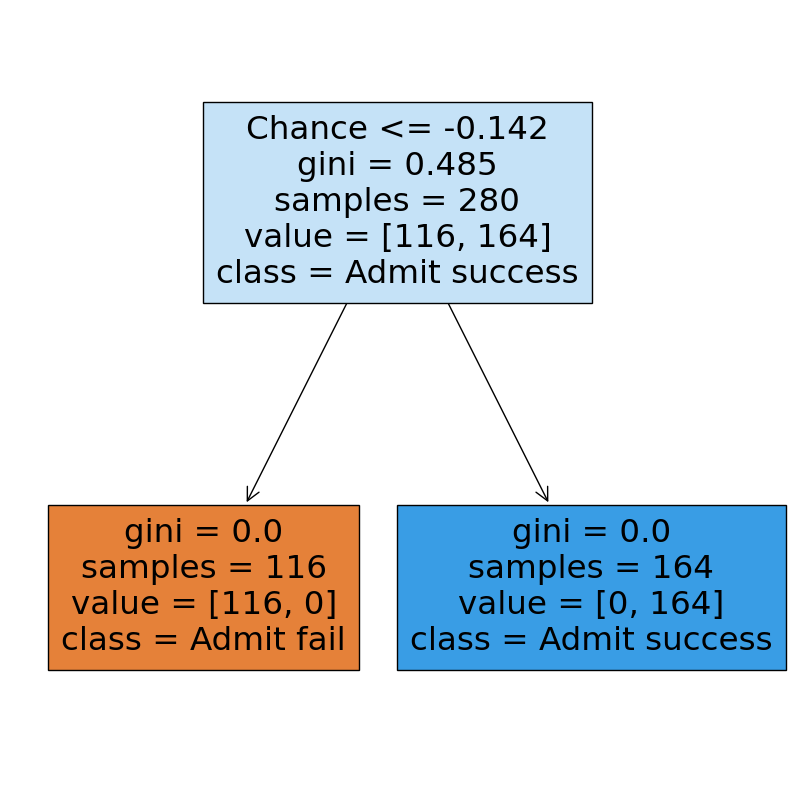

In [40]:
plt.figure(figsize = (10, 10))
plot_tree(tree_model, feature_names = list(x.columns), class_names = ['Admit fail', 'Admit success'], filled = True)
plt.show()

**Random forest**

In [41]:
forest = RandomForestClassifier()

In [42]:
forest_grid = {'n_estimators': [30, 50, 70, 100],
                 'max_depth': [2, 4, 6], 
                 'criterion': ['gini', 'entropy']}
forest_search = GridSearchCV(forest, forest_grid, n_jobs=-1)
forest_search.fit(x_train_scale, y_train)
forest_model = forest_search.best_estimator_

print('Best params:', forest_model.get_params())

Best params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 70, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [43]:
forest_prediction = forest_model.predict(x_test_scale)
forest_report = metrics.classification_report(y_test, forest_prediction, 
                                    target_names=['Admit fail', 'Admit success'])
print(forest_report)

               precision    recall  f1-score   support

   Admit fail       1.00      1.00      1.00        49
Admit success       1.00      1.00      1.00        71

     accuracy                           1.00       120
    macro avg       1.00      1.00      1.00       120
 weighted avg       1.00      1.00      1.00       120



In [44]:
cf_matrix_forest = confusion_matrix(y_test, forest_prediction)
print(cf_matrix_forest)

[[49  0]
 [ 0 71]]


**AdaBoost**

In [45]:
ada = AdaBoostClassifier()

In [47]:
ada_grid = {'base_estimator': [tree_model, forest_model],
                  'n_estimators': [2, 4, 5, 7],
                  'learning_rate': [0.1, 0.2, 0.3]}
ada_search = GridSearchCV(ada, ada_grid, n_jobs=-1)
ada_search.fit(x_train_scale, y_train)
ada_model = ada_search.best_estimator_

print('Best params:', ada_model.get_params())

Best params: {'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=2), 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 2, 'random_state': None}


In [48]:
ada_prediction = ada_model.predict(x_test_scale)
ada_report = metrics.classification_report(y_test, ada_prediction, 
                                    target_names=['Admit fail', 'Admit success'])
print(ada_report)

               precision    recall  f1-score   support

   Admit fail       1.00      1.00      1.00        49
Admit success       1.00      1.00      1.00        71

     accuracy                           1.00       120
    macro avg       1.00      1.00      1.00       120
 weighted avg       1.00      1.00      1.00       120



In [49]:
cf_matrix_ada = confusion_matrix(y_test, ada_prediction)
print(cf_matrix_ada)

[[49  0]
 [ 0 71]]
